In [ ]:
!pip install pandas numpy matplotlib seaborn

✅ Data loaded and cleaned.
           userId  productId  rating
0  A39HTATAQ9V7YF  205616461     5.0
1  A3JM6GV9MNOF9X  558925278     3.0
2  A1Z513UWSAAO0F  558925278     5.0
3  A1WMRR494NWEWV  733001998     4.0
4  A3IAAVS479H7M7  737104473     1.0
Shape of data: (404, 3)
✅ Active users/products filtered.

📊 Summary Statistics:
Total unique users: 0
Total unique products: 0
Average rating: nan

Top 5 Most Rated Products:
 Series([], Name: count, dtype: int64)

🔥 Top-rated Products (with >100 reviews):
Series([], Name: rating, dtype: float64)

🔁 Rating values clipped and log-transformed counts added.


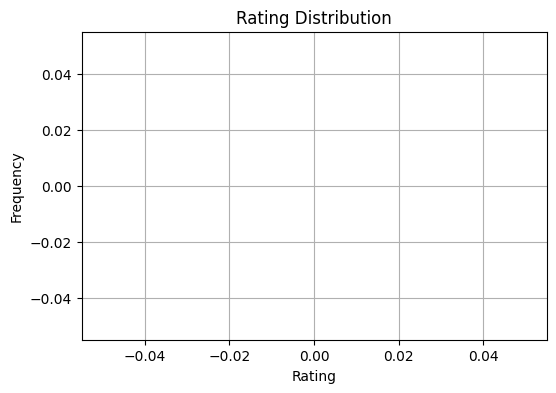

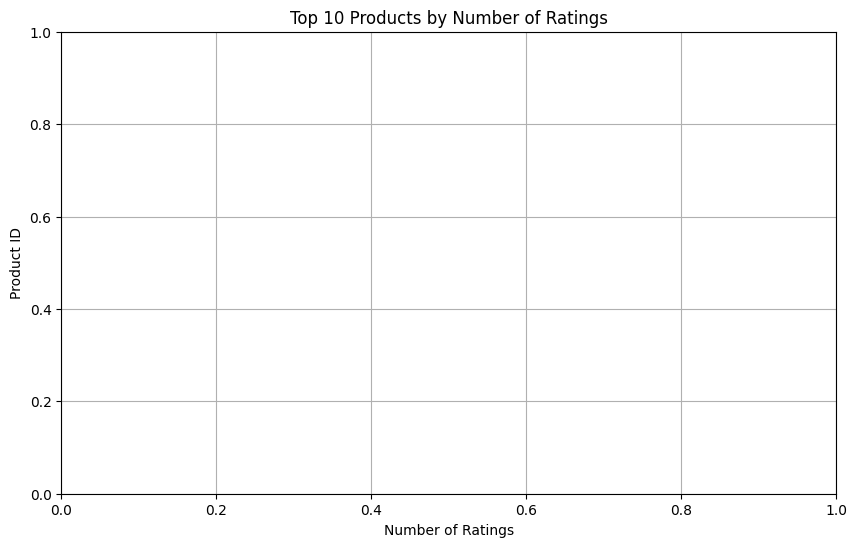

Sample data for heatmap is empty or all NaN, skipping plot.
📈 Visualizations complete.


In [5]:
# 📌 Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Step 2: Load and clean the dataset
def load_and_clean_data(filepath):
    df = pd.read_csv(filepath)
    
    # Drop duplicates and missing values
    df = df.drop_duplicates()
    df = df.dropna()
    
    # Convert rating to float
    df['rating'] = df['rating'].astype(float)
    
    return df

df = load_and_clean_data("../data/ratings.csv")  # make sure this path is correct

print("✅ Data loaded and cleaned.")
print(df.head())
print(f"Shape of data: {df.shape}")

# 📌 Step 3: Filter users and products with low activity (feature engineering)
def filter_active_users_products(df, min_ratings=50):
    product_counts = df['productId'].value_counts()
    user_counts = df['userId'].value_counts()

    df = df[df['productId'].isin(product_counts[product_counts >= min_ratings].index)]
    df = df[df['userId'].isin(user_counts[user_counts >= min_ratings].index)]

    return df

df = filter_active_users_products(df)
print("✅ Active users/products filtered.")

# 📌 Step 4: Summary Statistics and Insights
print("\n📊 Summary Statistics:")
print("Total unique users:", df['userId'].nunique())
print("Total unique products:", df['productId'].nunique())
print("Average rating:", round(df['rating'].mean(), 2))
print("\nTop 5 Most Rated Products:\n", df['productId'].value_counts().head())

# 📌 Step 5: Identifying patterns, trends, and anomalies
product_avg = df.groupby('productId')['rating'].mean()
product_count = df['productId'].value_counts()

print("\n🔥 Top-rated Products (with >100 reviews):")
print(product_avg[product_count > 100].sort_values(ascending=False).head())

# 📌 Step 6: Handling Outliers and Data Transformations
df['rating'] = df['rating'].clip(lower=1, upper=5)  # Ensuring rating boundaries
df['log_rating_count'] = np.log1p(df.groupby('productId')['rating'].transform('count'))

print("\n🔁 Rating values clipped and log-transformed counts added.")

# 📌 Step 7: Visualizations

# Distribution of Ratings
plt.figure(figsize=(6, 4))
sns.histplot(df['rating'], bins=5, kde=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Top Rated Products by Count
top_products = df['productId'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Number of Ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("Product ID")
plt.grid(True)
plt.show()

# Heatmap of Ratings (pivot table of sample data)
# Create pivot table (users x products)
pivot_df = df.pivot_table(index='userId', columns='productId', values='rating').fillna(0)

# Take a sample of up to 30 users and 30 products
num_users = min(30, pivot_df.shape[0])
num_products = min(30, pivot_df.shape[1])

sample = pivot_df.sample(n=num_users, axis=0).sample(n=num_products, axis=1)

if sample.size == 0 or sample.isnull().all().all():
    print("Sample data for heatmap is empty or all NaN, skipping plot.")
else:
    plt.figure(figsize=(12, 8))
    sns.heatmap(sample, cmap="YlGnBu")
    plt.title("Sample User-Product Ratings Heatmap")
    plt.xlabel("Product ID")
    plt.ylabel("User ID")
    plt.show()


print("📈 Visualizations complete.")
